In [1]:
from matplotlib import pyplot as plt
import numpy as np


def blocking(T):
    r = []
    A = []
    B = []
    
    for i in range(round(T/2)):
        r.append(1)
        A.append(1)
        B.append(0)
        
    for i in range(round(T/2)+1,T):
        r.append(1)
        A.append(1)
        B.append(1)
    
    return r,A,B

def inhibition(T):
    
    r = []
    A = []
    B = []
    
    for ii in range(T):
        if np.random.binomial(1,0.5) == 1:
            r.append(1)
            A.append(1)
            B.append(0)
        else:
            r.append(0)
            A.append(1)
            B.append(1)
    
    
    return r,A,B

def naiveModel(r,A,B,alpha = 0.1):
    
    T = len(r)
    VA = []
    VB = []
    
    for i in range(T):
        
        if i == 0:
            VA.append(alpha * r[i] * A[i])
            VB.append(alpha * r[i] * B[i])
        
        else:
            VA.append(VA[i-1] + alpha * (r[i] - VA[i-1]*A[i]))
            VB.append(VB[i-1] + alpha * (r[i] - VB[i-1]*B[i]))
            
    return VA,VB

def overshadowing(T):

    r = []
    A = []
    B = []
    for i in range(T):
        r.append(1)
        A.append(1)
        B.append(1)
    
    return r,A,B

def RescorlaWagnerModel(r,A,B,alpha = 0.1):
    
    T = len(r)
    VA = []
    VB = []
    
    
    for i in range(T):
        
        if i == 0:
            delta = r[i] - A[i] * 0 - B[i] * 0
            
            VA.append(0 + alpha * delta * A[i])
            VB.append(0 + alpha * delta * B[i])
            
        else:
            delta = r[i] - A[i] * VA[i-1] - B[i] * VB[i-1]
            
            VA.append(VA[i-1] + alpha * delta * A[i])
            VB.append(VB[i-1] + alpha * delta * B[i])
            
    return VA,VB


In [2]:
# Number of Trials
T = 100
#Overshadowing
r,A,B = overshadowing(T)
#Blocking
r,A,B = blocking(T)
#Inhibition
r,A,B = inhibition(T)

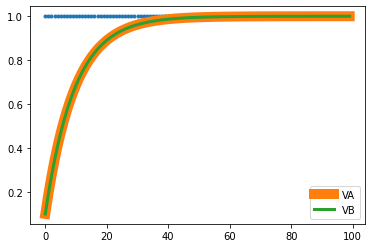

In [3]:
r,A,B = overshadowing(T)
#apply naive model of seperate updating to overshadowing data and plot it
VA,VB = naiveModel(r,A,B)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(r, '.')
ax.plot(VA, linewidth = 10, label = 'VA')
ax.plot(VB, linewidth =  3, label = 'VB')
ax.legend(loc = 'lower right')

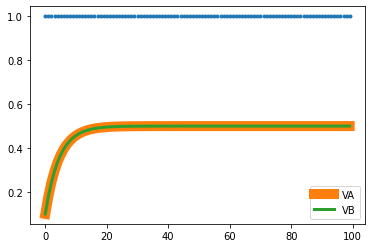

In [4]:
# apply Rescorla-Wagner model on overshadowing data and plot it
VA, VB = RescorlaWagnerModel(r,A,B)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(r, '.')
ax.plot(VA, linewidth = 10, label = 'VA')
ax.plot(VB, linewidth =  3, label = 'VB')
ax.legend(loc = 'lower right')

Text(0.5, 1.0, 'Rescrola - Wagner Overshadowing')

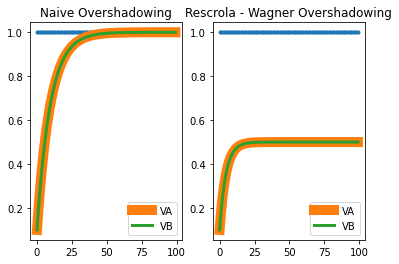

In [6]:
#compare naive model with rescrola-wagner model in overshadowing

fig = plt.figure()
ax = fig.add_subplot(121)

VA,VB = naiveModel(r,A,B)

ax.plot(r, '.')
ax.plot(VA, linewidth = 10, label = 'VA')
ax.plot(VB, linewidth =  3, label = 'VB')
ax.legend(loc = 'lower right')
ax.set_title('Naive Overshadowing')

ax2 = fig.add_subplot(122)

VA, VB = RescorlaWagnerModel(r,A,B)

ax2.plot(r, '.')
ax2.plot(VA, linewidth = 10, label = 'VA')
ax2.plot(VB, linewidth =  3, label = 'VB')
ax2.legend(loc = 'lower right')
ax2.set_title('Rescrola - Wagner Overshadowing')

Text(0.5, 1.0, 'Rescrola - Wagner Blocking')

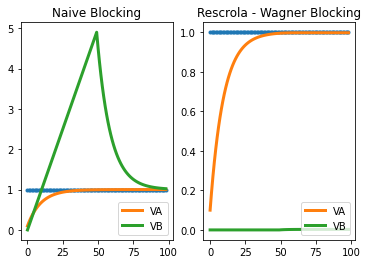

In [7]:
#compare naive model with rescrola-wagner model in blocking

r,A,B = blocking(T)

fig = plt.figure()
ax = fig.add_subplot(121)

VA,VB = naiveModel(r,A,B)

ax.plot(r, '.')
ax.plot(VA, linewidth = 3, label = 'VA')
ax.plot(VB, linewidth =  3, label = 'VB')
ax.legend(loc = 'lower right')
ax.set_title('Naive Blocking')

ax2 = fig.add_subplot(122)

VA, VB = RescorlaWagnerModel(r,A,B)
ax2.plot(r, '.')
ax2.plot(VA, linewidth = 3, label = 'VA')
ax2.plot(VB, linewidth =  3, label = 'VB')
ax2.legend(loc = 'lower right')
ax2.set_title('Rescrola - Wagner Blocking')

Text(0.5, 1.0, 'Rescrola - Wagner Inhibition')

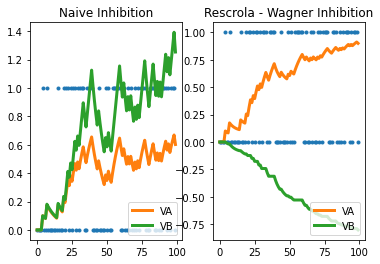

In [8]:
#compare naive model with rescrola-wagner model in inhibition

r,A,B = inhibition(T)

fig = plt.figure()
ax = fig.add_subplot(121)

VA,VB = naiveModel(r,A,B)

ax.plot(r, '.')
ax.plot(VA, linewidth = 3, label = 'VA')
ax.plot(VB, linewidth =  3, label = 'VB')
ax.legend(loc = 'lower right')
ax.set_title('Naive Inhibition')

ax2 = fig.add_subplot(122)

VA, VB = RescorlaWagnerModel(r,A,B)

ax2.plot(r, '.')
ax2.plot(VA, linewidth = 3, label = 'VA')
ax2.plot(VB, linewidth =  3, label = 'VB')
ax2.legend(loc = 'lower right')
ax2.set_title('Rescrola - Wagner Inhibition')
